<a href="https://colab.research.google.com/github/abdulkadirturkan/personalprojects-py/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recurrent Neural Network**

RNN'i anlayabilmek için öncelikle FeedForwarding prensibine tekrar bakalım.

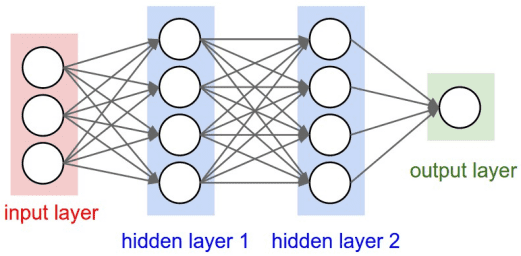



Feedforward çalışan yapıda gelen bilgi sadece ileri doğru işlenir. Bu yapıda kabaca, input verileri ağdan geçirilerek bir output değeri elde edilir.
Ağ üzerindeki ağırlık değerleri hataya bağlı olarak değiştirilir ve bu şekilde en doğru sonucu çıktı verebilen bir model oluşturulmuş olur.

Recurrent yapılar, outputlarını sonraki işlemde input olarak kullandıkları için feedforward yapılardan ayrılmış olurlar.

RNN, bir ANN(Artificial Neural Network) tipidir. Apple Siri ve Google sesli aramada kullanılmaktadır.

RNN, hisse senedi fiyatlarını tahmin etmek, metin oluşturmak, transkripsiyonlar ve makine çevirisi için yararlı olan dahili bir bellek nedeniyle geçmiş girdileri hatırlar.

FeedForwarding'de , her node da farklı ağırlıklar vardır. RNN ise ağın her katmanında aynı ağırlıkları paylaşır ve gradyan inişi sırasında kayıpları azaltmak için ağırlıklar ve temeller ayrı ayrı ayarlanır.

RNN'de, bilgi çevrim boyunca döngüye girer, böylece çıktı mevcut girdi ve daha önce alınan girdiler tarafından belirlenir.

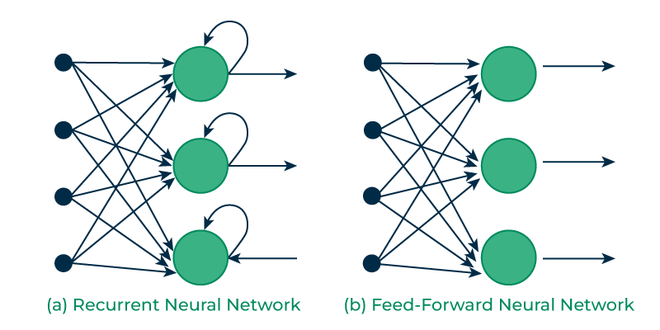



4 Tip RNN vardır.


1.   One to One
2.   One to Many
3.   Many to One
4.   Many to Many


**One to One** Tek bir girdi ve tek bir çıktı vardır basit NN'ler gibidir.

**One to Many** Tek girdi çok çıktı vardır. Görsel Yakalamada sıkça kullanılır. Bir Görsel verildiğinde birden çok kelime çıkartır.

**Many to One** Bu tür ağlar Duygusal Analiz gibi problemlerde kullanılırlar. Birden fazla kelimeyi girdi olarak verip çıktı olarak sadece duygusunu tahmin edebiliriz.

**Many to Many** Bu tür ağlara örnek olarak Dil Çevirisi verilebilir. Bir dilde birden fazla girdi verip diğer dilde birden fazla kelimeyi çıktı olarak tahmin edebiliriz.

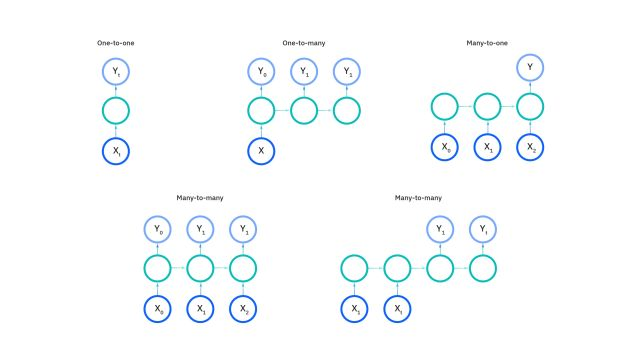

Her Xi için Gizli Katmandaki Hi hesaplanır.

h= σ(UX + Wh-1 + B)

Y = O(Vh + C)



Y = f (X, h , W, U, V, B, C)


X: mevcut zaman adımındaki girdidir.

W: girişi gizli duruma bağlar.

U: önceki gizli durumu mevcut gizli duruma bağlar.

B: girdilerin ve önceki gizli durumun ağırlıklı toplamına eklenen bir önyargı terimidir.

Y: gizli duruma göre hesaplanan ağın çıktısıdır.

V: gizli durumu çıkışa bağlar.

C: çıktıyı hesaplamak için gizli durumun ağırlıklı toplamına eklenen başka bir yanlılık terimidir.

Örnek: Aktivasyon Kodunu tanh alalım.

$$
x = \frac{{e^x - e^{-x}}}{{e^{x} + e^{-x}}}
$$

U, W, V rastgele başlatılmış ağırlık matrisleridir.

B, C rastgele Biaslardır.

"hello" için

1. Input Encoding:

  'h' -> [1, 0, 0] (one-hot encoded vector)

  'e' -> [0, 1, 0]

  'l' -> [0, 0, 1]

2. Forward Pass:
For simplicity, assume initial hidden state $$h_0=[0,0]$$
At time step t=1 (processing 'h')
$$h_1 =tanh(U⋅X_1 +W⋅h_0+B)$$

$$
U=
\begin{bmatrix}
0.1 & 0.2 \\
0.3 & 0.4 \\
0.5 & 0.6 \\
\end{bmatrix}
$$

$$
W=
\begin{bmatrix}
0.2 & 0.1 \\
0.4 & 0.3 \\
\end{bmatrix}
$$
$$
B=
\begin{bmatrix}
0.1 & 0.1 \\
\end{bmatrix}
$$
$$X_1 = [1,0,0]$$

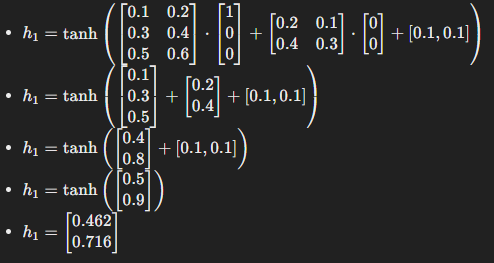

In [ ]:
import numpy as np

# Define the activation function(tanh)
def tanh(x):
    return np.tanh(x)

# Define the activation function(sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the input sequence
input_sequence = ['h', 'e', 'l', 'l', 'o']

# Define the vocabulary and its size
vocab = {'h': 0, 'e': 1, 'l': 2, 'o': 3}
vocab_size = len(vocab)

# One-hot encode the input sequence
one_hot_inputs = []
for char in input_sequence:
    one_hot = np.zeros(vocab_size)
    one_hot[vocab[char]] = 1
    one_hot_inputs.append(one_hot)

# Convert to NumPy array
one_hot_inputs = np.array(one_hot_inputs)

# Define the RNN parameters
hidden_size = 2
U = np.random.randn(hidden_size, vocab_size)
W = np.random.randn(hidden_size, hidden_size)
B = np.random.randn(hidden_size)
V = np.random.randn(vocab_size, hidden_size)
C = np.random.randn(vocab_size)

# Initialize hidden state
h_prev = np.zeros(hidden_size)

# Forward pass through the RNN
hidden_states = []
outputs = []
for X in one_hot_inputs:
    h = tanh(np.dot(U, X) + np.dot(W, h_prev) + B)
    y = np.dot(V, h) + C

    hidden_states.append(h)
    outputs.append(y)

    # Update previous hidden state for next time step
    h_prev = h

# Print the hidden states and outputs
for i in range(len(input_sequence)):
    print(f"Time step {i+1}:")
    print("Hidden state:", hidden_states[i])
    print("Output:", outputs[i])
    print()


Time step 1:
Hidden state: [-0.84146942  0.70826828]
Output: [ 1.65672207  2.14894138 -1.58626589 -0.57132412]

Time step 2:
Hidden state: [0.93532904 0.95421268]
Output: [-1.16429668  2.48133484  1.92710674  1.85406458]

Time step 3:
Hidden state: [0.71448355 0.2373543 ]
Output: [-2.06401044  1.43614493  1.6564491   1.11056839]

Time step 4:
Hidden state: [ 0.28907995 -0.03250336]
Output: [-1.77297033  1.04795971  0.86631315  0.39399168]

Time step 5:
Hidden state: [0.73587559 0.99388304]
Output: [-0.72504986  2.54243475  1.51643848  1.62513785]



In [ ]:
!pip install -U keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


IMDB veri seti, duygusal etiketlenmiş (olumlu veya olumsuz) büyük bir film incelemesi koleksiyonunu içerir. Duygu analizi görevleri için yaygın olarak kullanılan bir ölçekleme veri setidir.

Film incelemeleri doğası gereği sıralı verilerdir, bir incelemenin duygusunu etkileyen kelime sırasıdır. RNN'ler, sıralı verileri işlemek için uygundur ve bu nedenle metin verilerindeki duygu analizi görevleri için doğal bir seçimdir.

Özellikle burada uygulanan basit RNN'ler gibi, duygu analizi için görece basit ve yorumlanabilir modeller sunar. Bu, modelin giriş verisinin sıralı doğası üzerinden nasıl tahminlerde bulunduğunu anlamanın daha kolay olmasını sağlar.

IMDB veri seti üzerinde RNN'ler kullanarak duygu analizi yapılması, daha ileri teknikler için bir referans modeli olarak hizmet eder. Duygu analizi performansını iyileştirmek için farklı mimariler, hiperparametreler ve ön işleme teknikleriyle deney yapmaya başlamak için bir başlangıç noktası sağlar.

In [ ]:
# https://www.kaggle.com/code/tanyildizderya/imdb-dataset-sentiment-analysis-using-rnn

import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import SimpleRNN,Dense,Activation

In [ ]:
 #num_words=None parametresiyle kelime dağarcığının sınırlanmadığı, skip_top=0 parametresiyle en sık kullanılan kelimelerin atlanmadığı, maxlen=None parametresiyle örneklerin maksimum uzunluğunun sınırlanmadığı belirtiliyor.
 (X_train,Y_train),(X_test,Y_test) = imdb.load_data(path="imdb.npz",num_words=None,skip_top=0,maxlen=None,start_char=1,seed=13,oov_char=2,index_from=3)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("Type: ", type(X_train))
print("Type: ", type(Y_train))

Type:  <class 'numpy.ndarray'>
Type:  <class 'numpy.ndarray'>


In [ ]:
print("X train shape: ",X_train.shape)
print("Y train shape: ",Y_train.shape)

X train shape:  (25000,)
Y train shape:  (25000,)


In [ ]:
#Exploratory Data Analysis (Kaç farklı sınıf etiketi olduğunu gösterir)
print("Y train values: ",np.unique(Y_train))
print("Y test values: ",np.unique(Y_test))

Y train values:  [0 1]
Y test values:  [0 1]


In [ ]:
# Eğitim veri kümesindeki benzersiz sınıf etiketleri bulunur ve her bir sınıfın kaç örneği olduğu return_counts=True parametresiyle hesaplanır.
unique,counts = np.unique(Y_train,return_counts=True)
# Daha sonra, bu bilgiler bir sözlüğe dönüştürülerek sınıf etiketlerinin dağılımı Y train distribution olarak yazdırılır.
print("Y train distribution: ", dict(zip(unique,counts)))

Y train distribution:  {0: 12500, 1: 12500}


In [ ]:
# Test veri kümesindeki farklı sınıf etiketlerinin dağılımını hesaplar ve yazdırır. np.unique() fonksiyonu kullanılarak test veri kümesindeki benzersiz sınıf etiketleri bulunur ve her bir sınıfın kaç örneği olduğu return_counts=True parametresiyle hesaplanır.
unique,counts = np.unique(Y_test,return_counts=True)
print("Y test distribution: ", dict(zip(unique,counts)))

Y test distribution:  {0: 12500, 1: 12500}


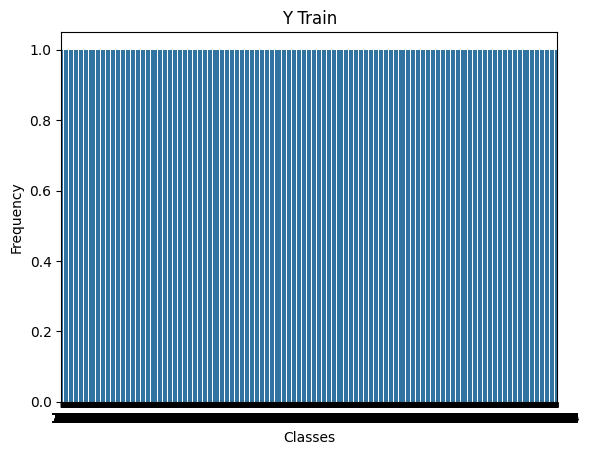

In [ ]:
# Eğitimdeki Sınıf etiketlerinin frekanslarını görselleştirir.
plt.figure();
sns.countplot(Y_train);
plt.xlabel("Classes");
plt.ylabel("Frequency");
plt.title("Y Train");

In [ ]:
# Testteki Sınıf etiketlerinin frekanslarını görselleştirir.
plt.figure();
sns.countplot(Y_test);
plt.xlabel("Classes");
plt.ylabel("Frequency");
plt.title("Y Test");

In [ ]:
# IMDB veri kümesi metin verilerini içerir ve her biri bir film incelemesini temsil eder.
# Bu kod, eğitim veri kümesindeki ilk film incelemesinin sayısal temsilini görüntüler.
# Bu sayılar, kelimelerin indeksleri olarak temsil edilir; yani her bir sayı, IMDB veri kümesinde belirli bir kelimenin indeksini gösterir.
print(X_train[0])

[1, 608, 13, 6467, 14, 22, 13, 80, 1109, 14, 20, 584, 18, 231, 72, 141, 6, 783, 254, 189, 7060, 13, 100, 115, 106, 14, 20, 584, 207, 82, 557, 111, 111, 537, 7, 4, 962, 12, 69, 11, 45, 204, 766, 33, 4, 8334, 23, 94, 797, 1048, 991, 527, 1987, 538, 2629, 4, 4518, 125, 72, 449, 8295, 68, 3385, 2500, 93, 14, 1190, 22, 13, 119, 12, 13, 197, 4, 226, 22, 16, 542, 5, 221, 14, 20, 9, 38, 629, 14, 9, 4, 6128, 20, 13, 28, 126, 110, 11, 61, 113, 24, 15, 51, 571, 11, 4, 22, 5, 4, 326, 7, 4, 22, 26, 24, 629, 195, 21, 51, 210, 188, 72, 16, 21849, 2726, 116, 118, 189, 22, 126, 164, 70, 126, 30, 14, 629, 174, 2195, 829, 33, 94, 61124]


In [ ]:
# Her bir film incelemesinin kelime sayısını verir ve bu uzunluklar listelere eklenir. Bu işlem sonucunda, her bir film incelemesinin uzunluğunu içeren iki liste elde edilir.
review_len_train = []
review_len_test = []
for i,j in zip(X_train,X_test):
    review_len_train.append(len(i))
    review_len_test.append(len(j))

In [ ]:
# Eğitim veri kümesindeki en kısa ve en uzun inceleme uzunluğunu belirler.
# Veri kümesindeki inceleme uzunlukları arasındaki aralığı gösterir.
print("min: ", min(review_len_train), "max: ", max(review_len_train))

min:  11 max:  2494


In [ ]:
# Test veri kümesindeki en kısa ve en uzun inceleme uzunluğunu belirler.
# Test veri kümesindeki inceleme uzunlukları arasındaki aralığı gösterir.
print("min: ", min(review_len_test), "max: ", max(review_len_test))

min:  7 max:  2315


<ipython-input-14-bad388684519>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(review_len_train,hist_kws={"alpha":0.3});
<ipython-input-14-bad388684519>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(review_len_test,hist_kws={"alpha":0.3});


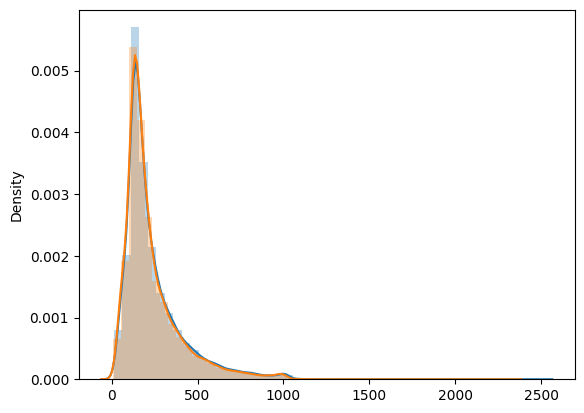

In [ ]:
# Eğitim ve test veri kümesindeki inceleme uzunluklarının dağılımını görselleştirir.
# Her iki veri kümesinin inceleme uzunluklarının dağılımını karşılaştırmak mümkün olur.
sns.distplot(review_len_train,hist_kws={"alpha":0.3});
sns.distplot(review_len_test,hist_kws={"alpha":0.3});

In [ ]:
# Eğitim veri kümesinin inceleme uzunluklarının ortalamasını, medyanını ve modunu hesaplar.
# Bu istatistikler, eğitim veri kümesinin inceleme uzunluklarının merkezi eğilimini gösterir.
print("Train mean: ",np.mean(review_len_train))
print("Train median: ",np.median(review_len_train))
print("Train mode: ",stats.mode(review_len_train))

Train mean:  238.71364
Train median:  178.0
Train mode:  ModeResult(mode=132, count=196)


In [ ]:
# IMDb veri kümesinin içinde bulunan kelimeleri ve bu kelimelerin indekslerini içeren bir sözlük oluşturur
word_index = imdb.get_word_index()
# Değişkenin türü kontrol edilir ve sonuç olarak <class 'dict'> olarak çıktı verir, yani bu değişken bir Python sözlüğüdür.
print(type(word_index))

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
<class 'dict'>


In [ ]:
# IMDb veri kümesinde bulunan toplam kelime sayısını temsil eder.
print("length of word_index: ",len(word_index))

length of word_index:  88584


In [ ]:
# IMDb veri kümesindeki kelimelerin indekslerini ve kelimelerini eşleştirir ve eğer bir kelimenin indeksi 1 ise bu kelimenin kendisini yazdırır.
# Bu durumda, eğer bir kelimenin indeksi 1 ise bu kelimenin "the" olduğu anlamına gelir. Bu kod, en sık kullanılan kelimelerin IMDb veri kümesindeki indekslerini ve bu kelimeleri göstermek için kullanılabilir.
for keys,values in word_index.items():
    if values == 1:
        print(keys)

the


In [ ]:
# Bu fonksiyon, IMDb veri kümesindeki belirli bir incelemeyi çözmek için kullanılır ve bu incelemenin etiketini (olumlu veya olumsuz) gösterir. Bu örnek, varsayılan olarak 24. indeksteki bir incelemeyi çözer. (Çıktısı 1 yani Olumlu)
def whatItSay(index=24):
    reverse_index = dict([(value,key) for (key,value) in word_index.items()])
    decode_review = " ".join([reverse_index.get(i-3, "!") for i in X_train[index]])
    print(decode_review)
    print(Y_train[index])
    return decode_review

decoded_review = whatItSay()

! this movie was extremely funny i would like to own this for my vintage collection of 1970s movie must see again list i know this cast of characters they are people that i have met over the years and that prompt me to search out this comedy unfortunately this was never put to dvd or vhs redd foxx always a clown of comedy pearl baily a great match as his wife witty and sassy norman a son with a secret not sure if he will have a future if it is out dennis dugan crazy funny man miss dobson hooker with a heart and little conscience love lust strange family ties this movie qualifies for a come back encore performance situation comedy with a mix of events as this could and should find its way as a remake i do think finding cast would be extremely difficult maybe impossible except jerry seinfeld playing dennis dugan role this earmarks a couple of seinfeld episodes that also brought me back to norman is that you keeping them in the closest was surely impossible as impossible to reform pretend

In [ ]:
# Çıktısı 0 yani Olumsuz
decoded_review = whatItSay(5)

! quite possibly how francis veber one of the best comedy directors in the world at least when sticking to his native france managed to turn in a film so completely unwatchable is beyond the reason of mere mortal man to discern it's not just that the characters are so unlikeable or that the film is so utterly devoid of even the lowest form of wit it's genuinely physically painful to watch such an endless parade of inept writing acting and film making that you cannot believe this is the work of experienced and talented filmmakers for once the near eternity spent in the cutting room and on the shelf before its blink and you'll miss it theatrical release tells the whole story what were they thinking
0


In [ ]:
#PreProcess
# IMDb veri kümesini yüklemeden önce bir ön işleme adımını gerçekleştirir. Yüklenen veri kümesindeki en sık kullanılan 15,000 kelimeyi kullanmak üzere sınırlar. Bu, veri kümesinin boyutunu azaltarak işlem maliyetini düşürme ve modelin eğitimini hızlandırabiliriz.
num_words = 15000
(X_train,Y_train),(X_test,Y_test) = imdb.load_data(num_words=num_words)

In [ ]:
# Yüklenen metin verilerinin her birinin maksimum uzunluğunu 130 kelimeyle sınırlar.
# Eğer bir metnin uzunluğu 130 kelimeyi aşarsa, fazla kısımlar kesilir; eğer bir metnin uzunluğu 130 kelimeye ulaşmazsa, eksik kısımlar sıfırlarla doldurulur.
# Bu işlem, tüm giriş verilerini aynı boyuta getirerek, modele verilen veri miktarını standartlaştırmayı sağlar.
maxlen=130
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [ ]:
print("X train shape: ",X_train.shape)

X train shape:  (25000, 130)


In [ ]:
# Metnin başlangıcında 0'lar eklenmiştir çünkü metin, maksimum uzunluğa ulaşmadığı için tamamlanmıştır.
# Metnin içeriği, 1'den başlayarak numaralandırılmış kelime kodlarını içerir; 0, dolgu için kullanılan bir değerdir. Bu haliyle, metin modelde işlenmeye hazırdır.
print(X_train[5])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1  778  128   74   12  630  163   15    4 1766 7982
 1051    2   32   85  156   45   40  148  139  121  664  665   10   10
 1361  173    4  749    2   16 3804    8    4  226   65   12   43  127
   24    2   10   10]


In [ ]:
# Eğitim veri kümesindeki ilk 10 örneğin uzunlukları
for i in X_train[0:10]:
    print(len(i))

130
130
130
130
130
130
130
130
130
130


In [ ]:
# OOV(Out of Vocabulary) karakteri 2 ayarlandığı için 0 olan kısımları "!" olarak göstermekte
decoded_review = whatItSay(5)

! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! ! begins better than it ends funny that the russian submarine crew ! all other actors it's like those scenes where documentary shots br br spoiler part the message ! was contrary to the whole story it just does not ! br br
0


In [ ]:
#Construct RNN
# Bu model, ikili sınıflandırma problemleri için sigmoid aktivasyon fonksiyonu ve binary_crossentropy kayıp fonksiyonu ile derlenmiştir. rmsprop optimizeri kullanılmıştır.
rnn = Sequential()

rnn.add(Embedding(num_words,32,input_length =len(X_train[0]))) # num_words=15000
rnn.add(SimpleRNN(16,input_shape = (num_words,maxlen), return_sequences=False,activation="relu"))
rnn.add(Dense(1)) #flatten
rnn.add(Activation("sigmoid")) #using sigmoid for binary classification

print(rnn.summary())
rnn.compile(loss="binary_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Eğitim tamamlandığında, modelin eğitim süreci history değişkenine atanır. Bu değişken, eğitim ve doğrulama setleri için kayıp ve doğruluk değerlerini içerir.
# Bu değerler, modelin eğitim sürecini izlemek ve sonuçlarını görselleştirmek için kullanılabilir.
history = rnn.fit(X_train,Y_train,validation_data = (X_test,Y_test),epochs = 5,batch_size=128,verbose = 1)

Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.5775 - loss: 0.6709 - val_accuracy: 0.7874 - val_loss: 0.5026
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.7946 - loss: 0.4803 - val_accuracy: 0.8110 - val_loss: 0.4274
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.8408 - loss: 0.3816 - val_accuracy: 0.8083 - val_loss: 0.4650
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.8654 - loss: 0.3282 - val_accuracy: 0.8351 - val_loss: 0.3779
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.8864 - loss: 0.2806 - val_accuracy: 0.8563 - val_loss: 0.3410


In [ ]:
# RNN modelinin test veri seti üzerindeki performansını değerlendirir
score = rnn.evaluate(X_test,Y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8543 - loss: 0.3442


In [ ]:
print("accuracy:", score[1]*100)

accuracy: 85.63200235366821


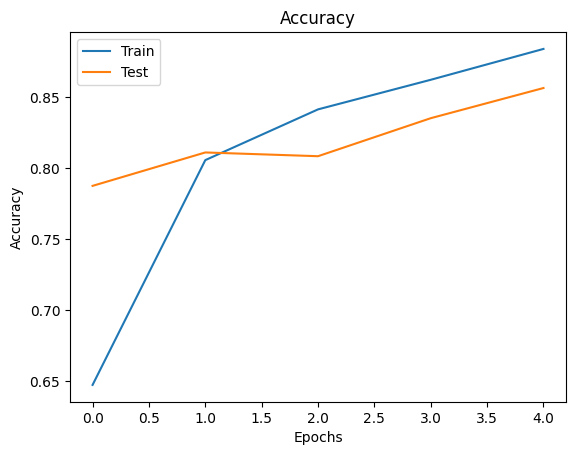

In [ ]:
# Model eğitim süreci boyunca performansını geliştirdi ancak aşırı uyum yapmaktan kaçınarak test verisinde iyi bir genelleme yeteneği gösterdi.
# Modeli Epoch 3'te durdurmak, overfitting'i önlemek için iyi bir seçenek olabilir.
plt.figure()
plt.plot(history.history["accuracy"],label="Train");
plt.plot(history.history["val_accuracy"],label="Test");
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show();

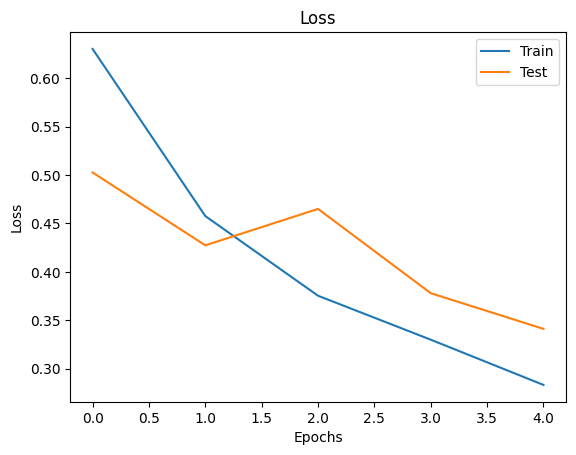

In [ ]:
# Eğitim ve test kayıplarının her iki durumda da azaldığını gösteriyor, bu da modelin eğitim süreci boyunca iyileştiğini gösterir.
# Daha düşük kayıplar, modelin daha iyi bir performans elde ettiğini ve eğitim verilerine ve test verilerine daha iyi uyum sağladığını gösterir.
# Ancak, Epoch 2'de test kaybının artması bir uyarı işareti olabilir. Modelin aşırı uyum yapmaya başlayabileceğini ve daha fazla eğitimin genelleme yeteneğini olumsuz etkileyebileceğini gösterebilir.
plt.figure()
plt.plot(history.history["loss"],label="Train");
plt.plot(history.history["val_loss"],label="Test");
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
plt.show();

**BPTT(Backpropagation Trough Time)**

Recurrent ağların amacı sıralı inputları doğru bir şekilde sınıflandırmak diyebiliriz. Bu işlemleri yapabilmek için hatanın backpropunu ve gradient descentini kullanırız.

Backprop, feedforward ağlarda sondaki outputtaki hatayı geriye hatanın türevini ağırlıklara dağıtılarak yapılır. Bu türev kullanılarak öğrenme katsayısı, gradient descent düzenlenerek hatayı düşürecek şekilde ağırlıklar düzenlenir.

BPTT diye bilinen zamana bağlı sıralı bir dizi hesaplamanın tümü için backprop uygulamasıdır. Yapay ağlar bir dizi fonksiyonu içiçe f(h(g(x))) şeklinde kullanır. Buraya zamana bağlı değişken eklendiğinde türev işlemi zincir kuralı ile çözümlenebilir.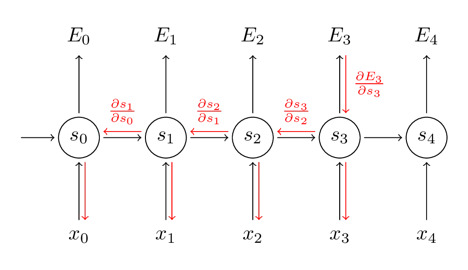

Üstteki figürde ise sıralı 5 girdili bir recurrent ağ yapısı gösterilmektedir. E burada oluşan hatayı ifade etmektedir. Örneğin, E3 için backpropagation yaparken yaptığımız işlemde w ağırlığına göre türevi kullanılmaktadır. Bu türevi çözebilmek için zincir kuralı ile birkaç türevin çarpımını kullanırız.


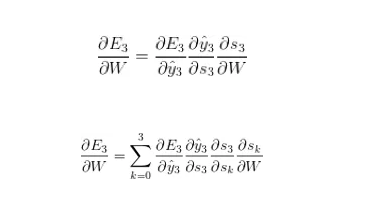

Burada s3’ün açılımında s2’ye bir bağımlılık bulunur. Bunu çözebilmek için yine zincir kuralını kullanarak s3’ün s2’ye türevini de ekleyerek sonucu bulabiliriz. Böylece formüldeki gibi gradient zamana bağlı şekilde dağıtılmış olur.


 \begin{equation*}      \frac{\partial E_{3}}{\partial W_{X}} = (\frac{\partial E_{3}}{\partial Y_{3}} . \frac{\partial Y_{3}}{\partial S_{3}} . \frac{\partial S_{3}}{\partial W_{X}})     +   \end{equation*}
   \begin{equation*}     (\frac{\partial E_{3}}{\partial Y_{3}} . \frac{\partial Y_{3}}{\partial S_{3}} . \frac{\partial S_{3}}{\partial S_{2}} . \frac{\partial S_{2}}{\partial W_{X}})      +   \end{equation*}

   \begin{equation*}      (\frac{\partial E_{3}}{\partial Y_{3}} . \frac{\partial Y_{3}}{\partial S_{3}} . \frac{\partial S_{3}}{\partial S_{2}} . \frac{\partial S_{2}}{\partial S_{1}} . \frac{\partial S_{1}}{\partial W_{X}})   \end{equation*}

Kısaca
  \begin{equation*}  \frac{\partial E_{N}}{\partial W_{S}} = \sum_{i=1}^{N} \frac{\partial E_{N}}{\partial Y_{N}} . \frac{\partial Y_{N}}{\partial S_{i}} . \frac{\partial S_{i}}{\partial W_{X}}  \end{equation*}

**Vanishing/Exploding Gradient ( Gradient yokolması/uçması)**

Gradient tüm ağırlıkları ayarlamamızı sağlayan bir değerdir. Ancak birbirine bağlı uzun ağlarda hatanın etkisi oldukça düşerek gradient kaybolmaya başlayabilir.

Bu da doğru sonucu bulmayı olanaksızlaştırır. Bütün katmanlar ve zamana bağlı adımlar birbirine çarpımla bağlı olduğundan, türevleri yokolma veya uçma yani aşırı yükselme tehlikesindedir.

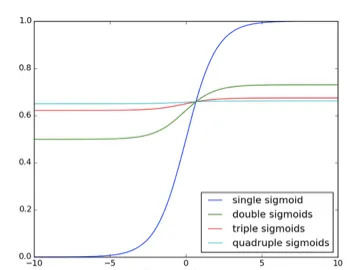


Gradient exploding yani aşırı büyümesi ağın çok büyük değerler üretmesini sağlayarak doğru sonuçtan uzaklaştıracaktır. Bunun için threshold koyarak çok yüksek değerli gradientleri kesmek basit ve etkili yollardan biridir. Gradientlerin aşırı küçülerek yokolması ise çok daha zor bir problemdir. Nerde, ne zaman durdurulması gerektiği çok açık değildir.

W için uygun başlangıç değerleri seçmek yokolma etkisini azaltacaktır. Bir diğer çözüm ise sigmoid ve tanh aktivasyon fonksiyonları yerine ReLU kullanmaktır. ReLU fonksiyonunun türevi 0 veya 1’dir. Bu sebepten böyle bir problem içerisine girmeyecektir.

**LSTM(Long Short Term Memory)**

LSTM backprop’ta farklı zaman ve katmanlardan gelen hata değerini korumaya yarıyor. Daha sabit bir hata değeri sağlayarak recurrent ağların öğrenme adımlarının devam edebilmesini sağlamaktadır. Bunu sebep sonuç arasına yeni bir kanal açarak yapmaktadır.

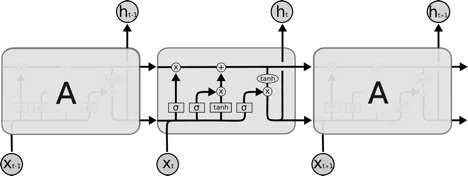

LSTM yapısında tekrar eden modülün farkı tek bir neural network katmanı yerine, özel bir şekilde bağlı 4 katman bulunmasıdır. Bu katmanlara kapı da denmektedir. Normal akışın dışında dışarıdan bilgi alan bir yapıdır. Bu bilgiler depolanabilir, hücreye yazılabilir, okunabilir.

Hücre neyi depolayacağını, ne zaman okumasına, yazmasına veya silmesine izin vereceğini kapılar sayesinde karar verir. Bu kapılarda bir ağ yapısı ve aktivasyon fonksiyonu bulunmaktadır. Aynı nöronlarda olduğu gibi gelen bilgiyi ağırlığına göre geçirir veya durdurur. Bu ağırlıklar recurrent ağın öğrenmesi sırasında hesaplanır. Bu yapı ile hücre, datayı alacak mı bırakacak mı silecek mi öğrenir.

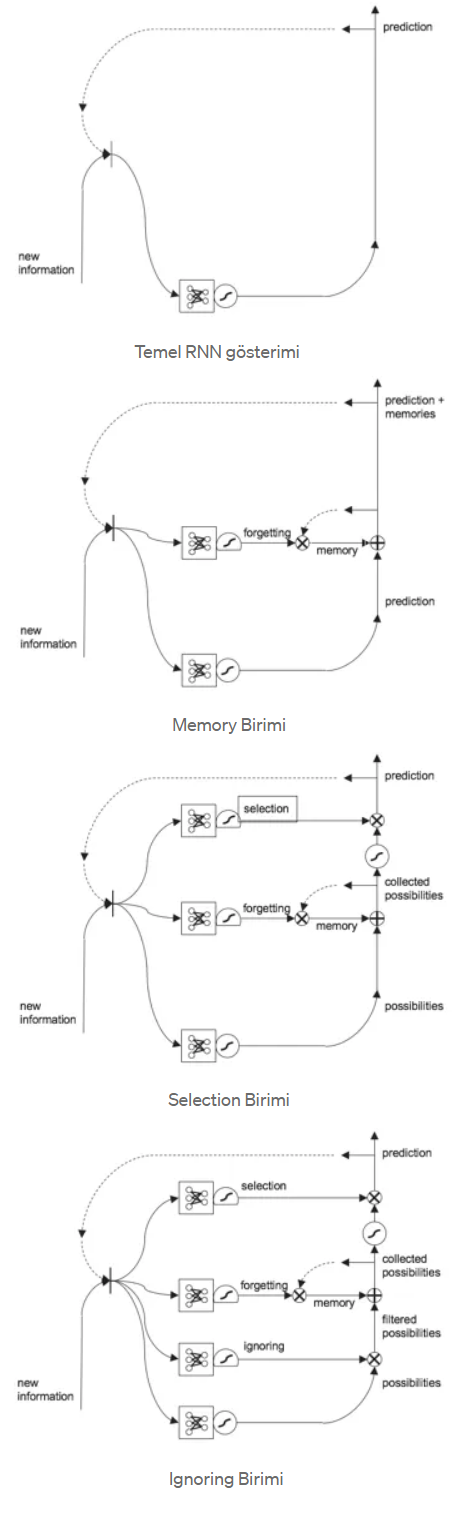

In [ ]:
# LSTM modeli ile zaman serisi tahmini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
#https://www.geeksforgeeks.org/long-short-term-memory-lstm-rnn-in-tensorflow/

df = pd.read_csv('/content/monthly_milk_production.csv',
                 index_col='Date',
                 parse_dates=True)
df.index.freq = 'MS'

In [ ]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

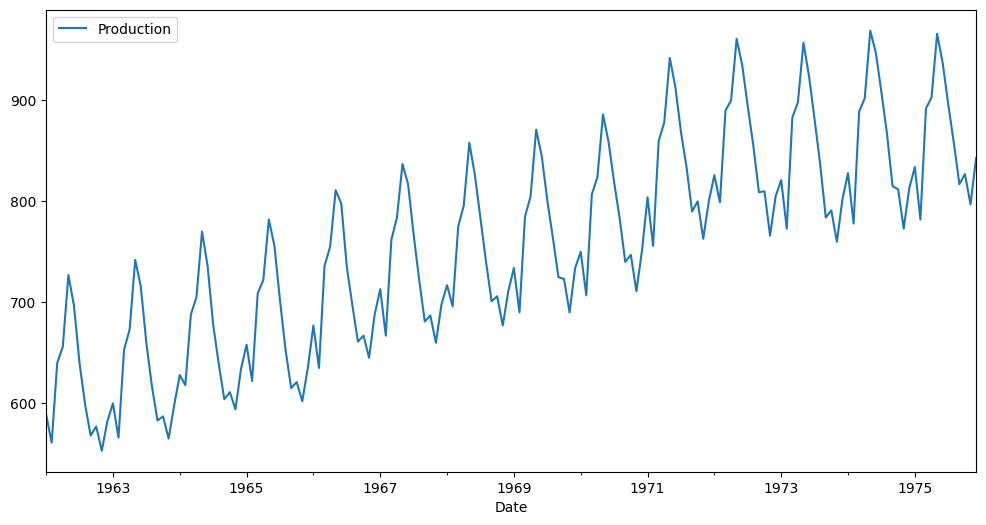

In [ ]:
# Plotting graph b/w production and date
df.plot(figsize=(12, 6))

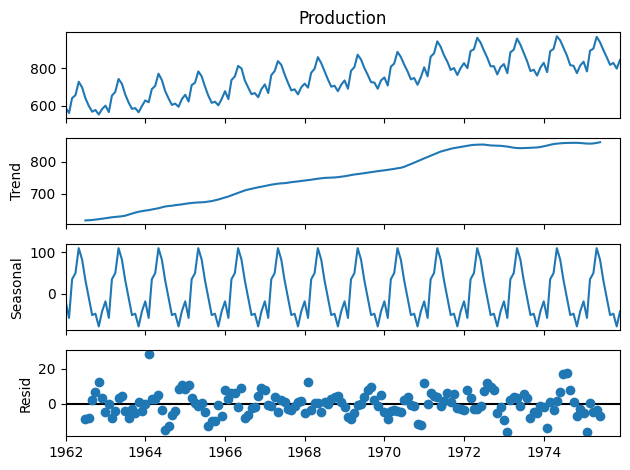

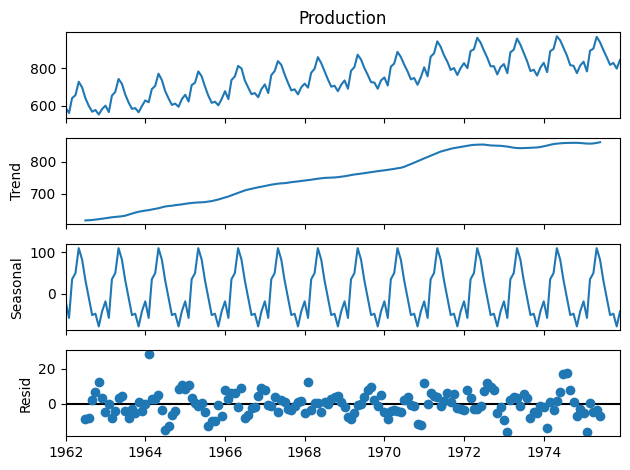

In [ ]:
# Verinin mevsimsel bileşenlerini incelemek için mevsimsel ayrıştırma yapılır ve sonuçlar görselleştirilir
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['Production'])
results.plot()

In [ ]:
#Data split
train = df.iloc[:156]
test = df.iloc[156:]

In [ ]:
#Scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=n_input,
                                batch_size=1)
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train,
                                scaled_train,
                                length=n_input,
                                batch_size=1)

Given the Array: 
[0.08653846 0.01923077 0.20913462]
Predict this y: 
 [[0.24759615]]


In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu',
               input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()
model.fit(generator, epochs=5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
144/144 [==============================] - 4s 9ms/step - loss: 0.0335
Epoch 2/5
144/144 [==============================] - 1s 9ms/step - loss: 0.0182
Epoch 3/5
144/144 [==============================] - 1s 9ms/step - loss: 0.0118
Epoch 4/5
144/144 [==============================] - 2s 15ms/step - loss: 0.0071
Epoch 5/5
144/144 [==============================] - 2s 13ms/step - loss: 0.0064
